In [2]:
import os
import numpy as np
import cv2
import json
from pathlib import Path
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
from torchvision.utils import make_grid



In [257]:
from matplotlib.pyplot import imshow, figure
import matplotlib as mpl

def view_image(ii, dpi=100):
    mpl.rcParams['figure.dpi'] = dpi
    if len(ii.shape) == 3:        
        imshow(ii)
        return
    t = torch.from_numpy(ii)
    t = t.permute(0, 3, 1, 2)
    n = make_grid(t,padding=2,nrow=3)
    imshow(n.numpy().transpose(1,2,0))

def view_gray(ii, dpi=100):
    mpl.rcParams['figure.dpi'] = dpi
    if len(ii.shape) == 2:   
        imshow(ii, cmap='gray')
        return
    print(ii.shape)
    t = torch.from_numpy(ii).unsqueeze(-1)
    t = t.permute(0, 3, 1, 2)
    n = make_grid(t, padding=4, pad_value=255,nrow=3)
    print(n.shape)
    imshow(n.numpy().transpose(1,2,0),cmap='gray')


In [258]:
datapath = Path('/data/private/dataset/clevr/CLEVR_0')
datapath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/')
idx = 0
shapes = ['full','cylinder','cube','sphere']
imgpath = []
imgpath.append(('original', datapath / '{}.png'.format(idx)))
for s in shapes:
    imgpath.append((s, datapath / '{}_{}.png'.format(s, idx)))
annpath = datapath / '{}.json'.format(idx)

In [259]:
datapath = Path('/data/private/dataset/clevr/CLEVR_0')
datapath = Path('/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/')
idx = 0
imgpath = list(datapath.glob('{}*.png'.format(idx)))
imgpath.sort()

annpath = datapath / '{}.json'.format(idx)

/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0.png
/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0_0.png
/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0_1.png
/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0_2.png
/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0_3.png
/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0_4.png
/data/private/work/gqn/datasets/clevr-dataset-gen/image_generation/CLEVR_0/0_5.png


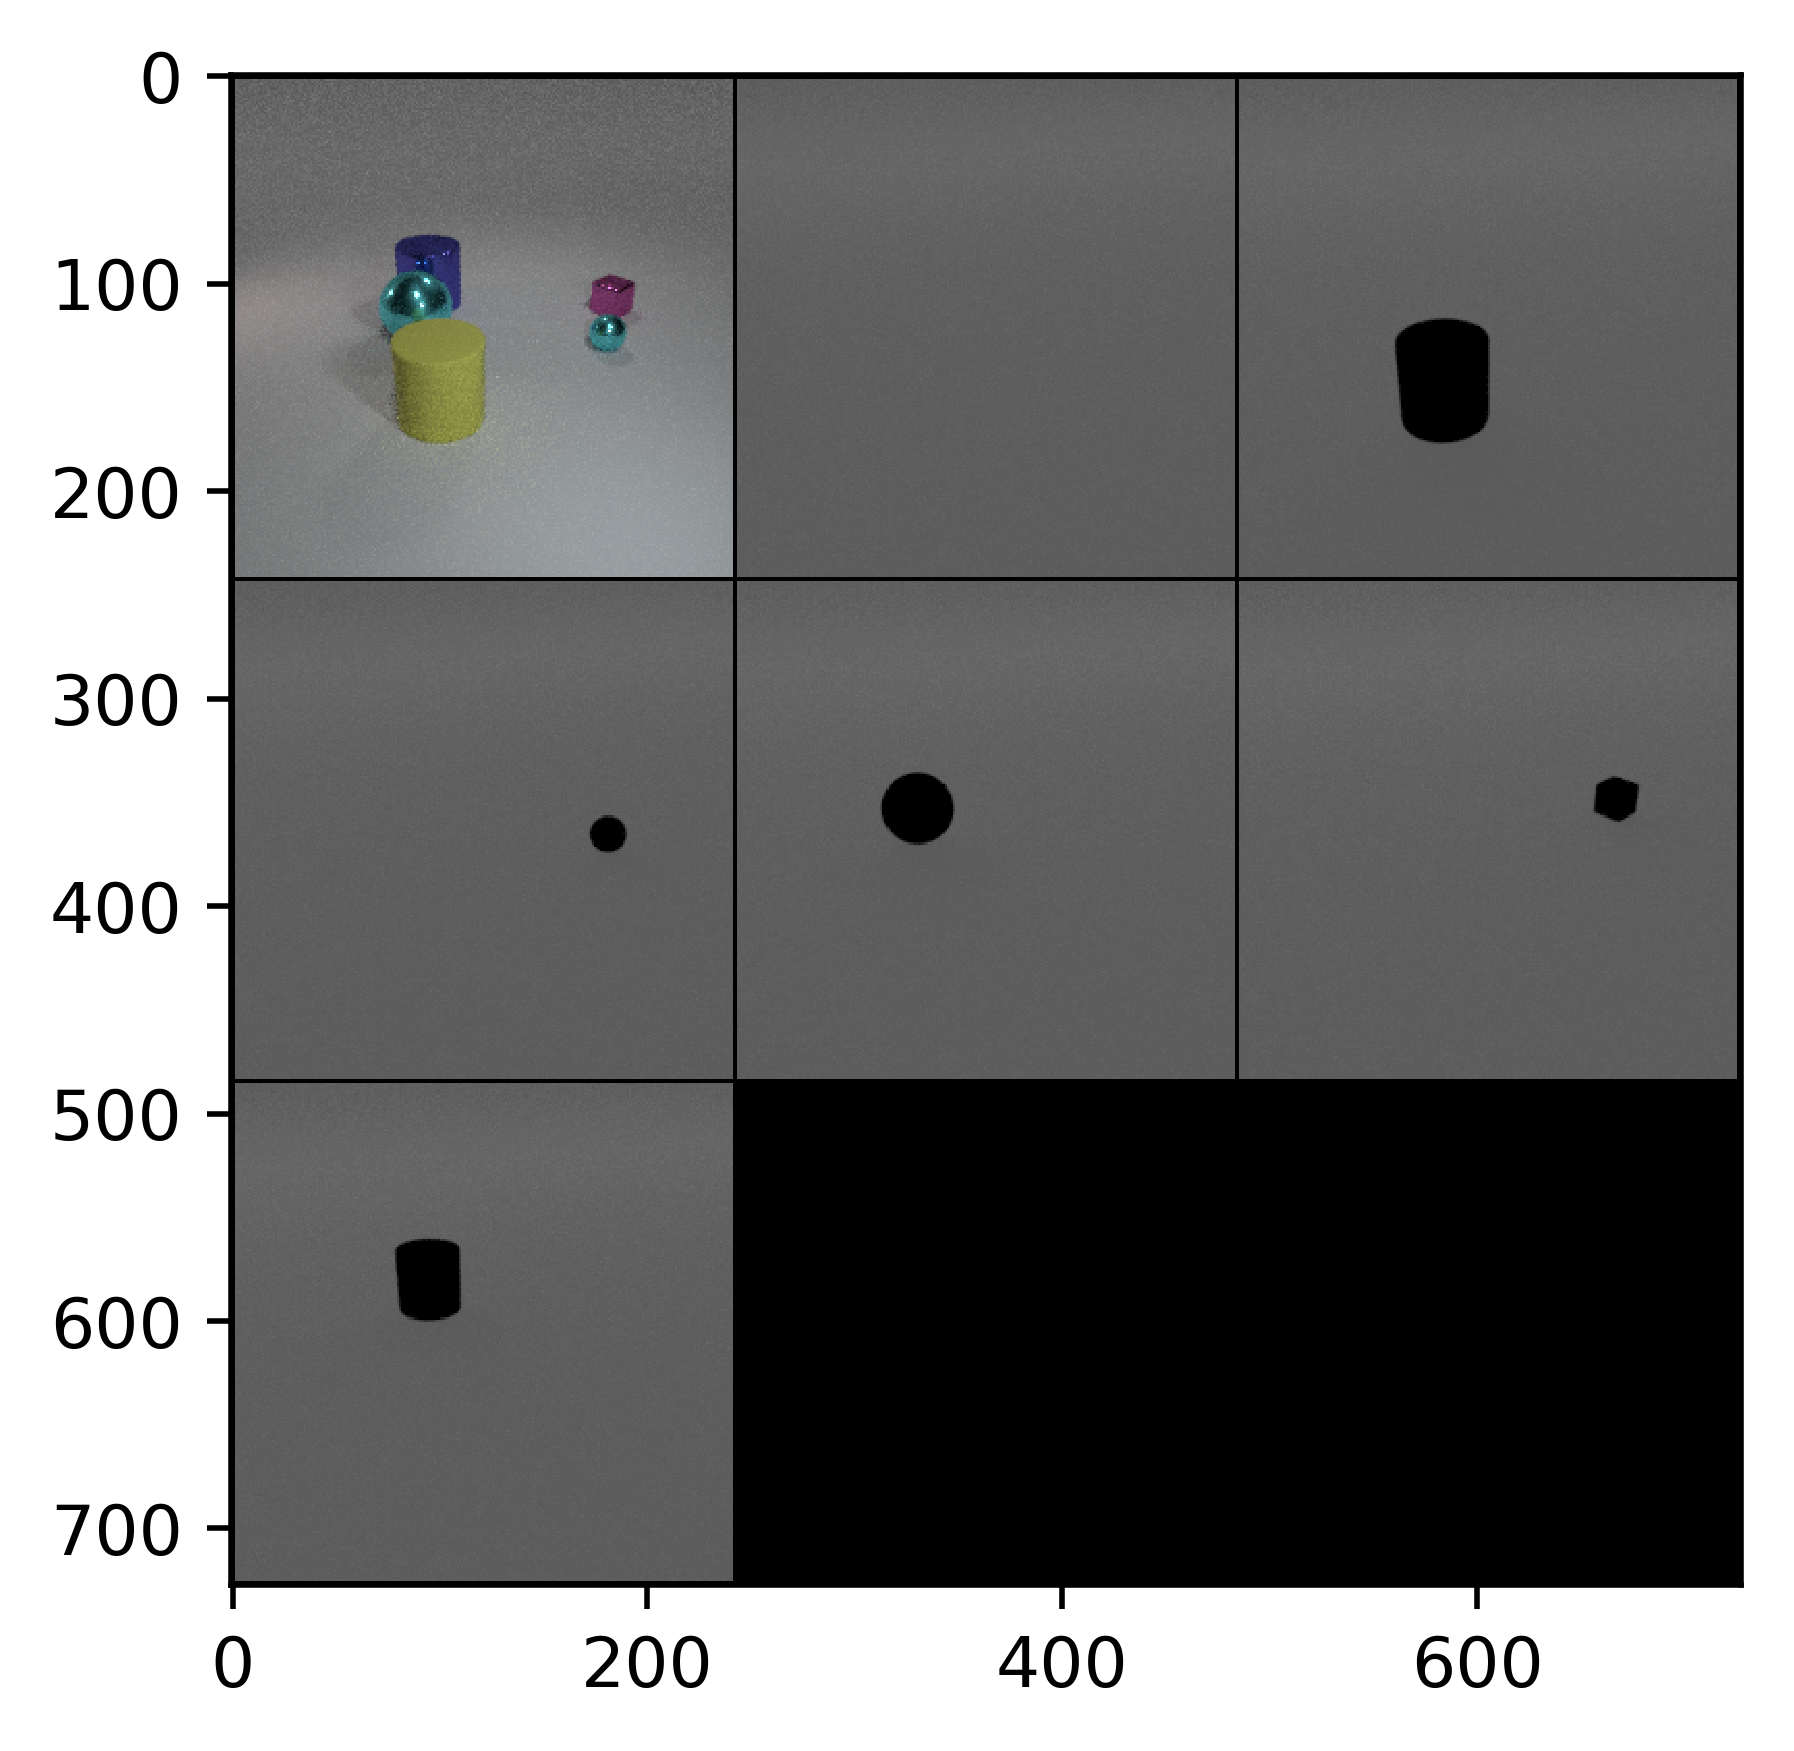

In [266]:
with open(annpath, 'r') as f:
    ann = json.load(f)

img = []
for i in imgpath:
    print(i)
    img.append(cv2.imread(str(i)))

imgs = np.stack(img)
view_image(imgs, 500)

6
(6, 240, 240)
torch.Size([3, 491, 735])
(6, 240, 240)


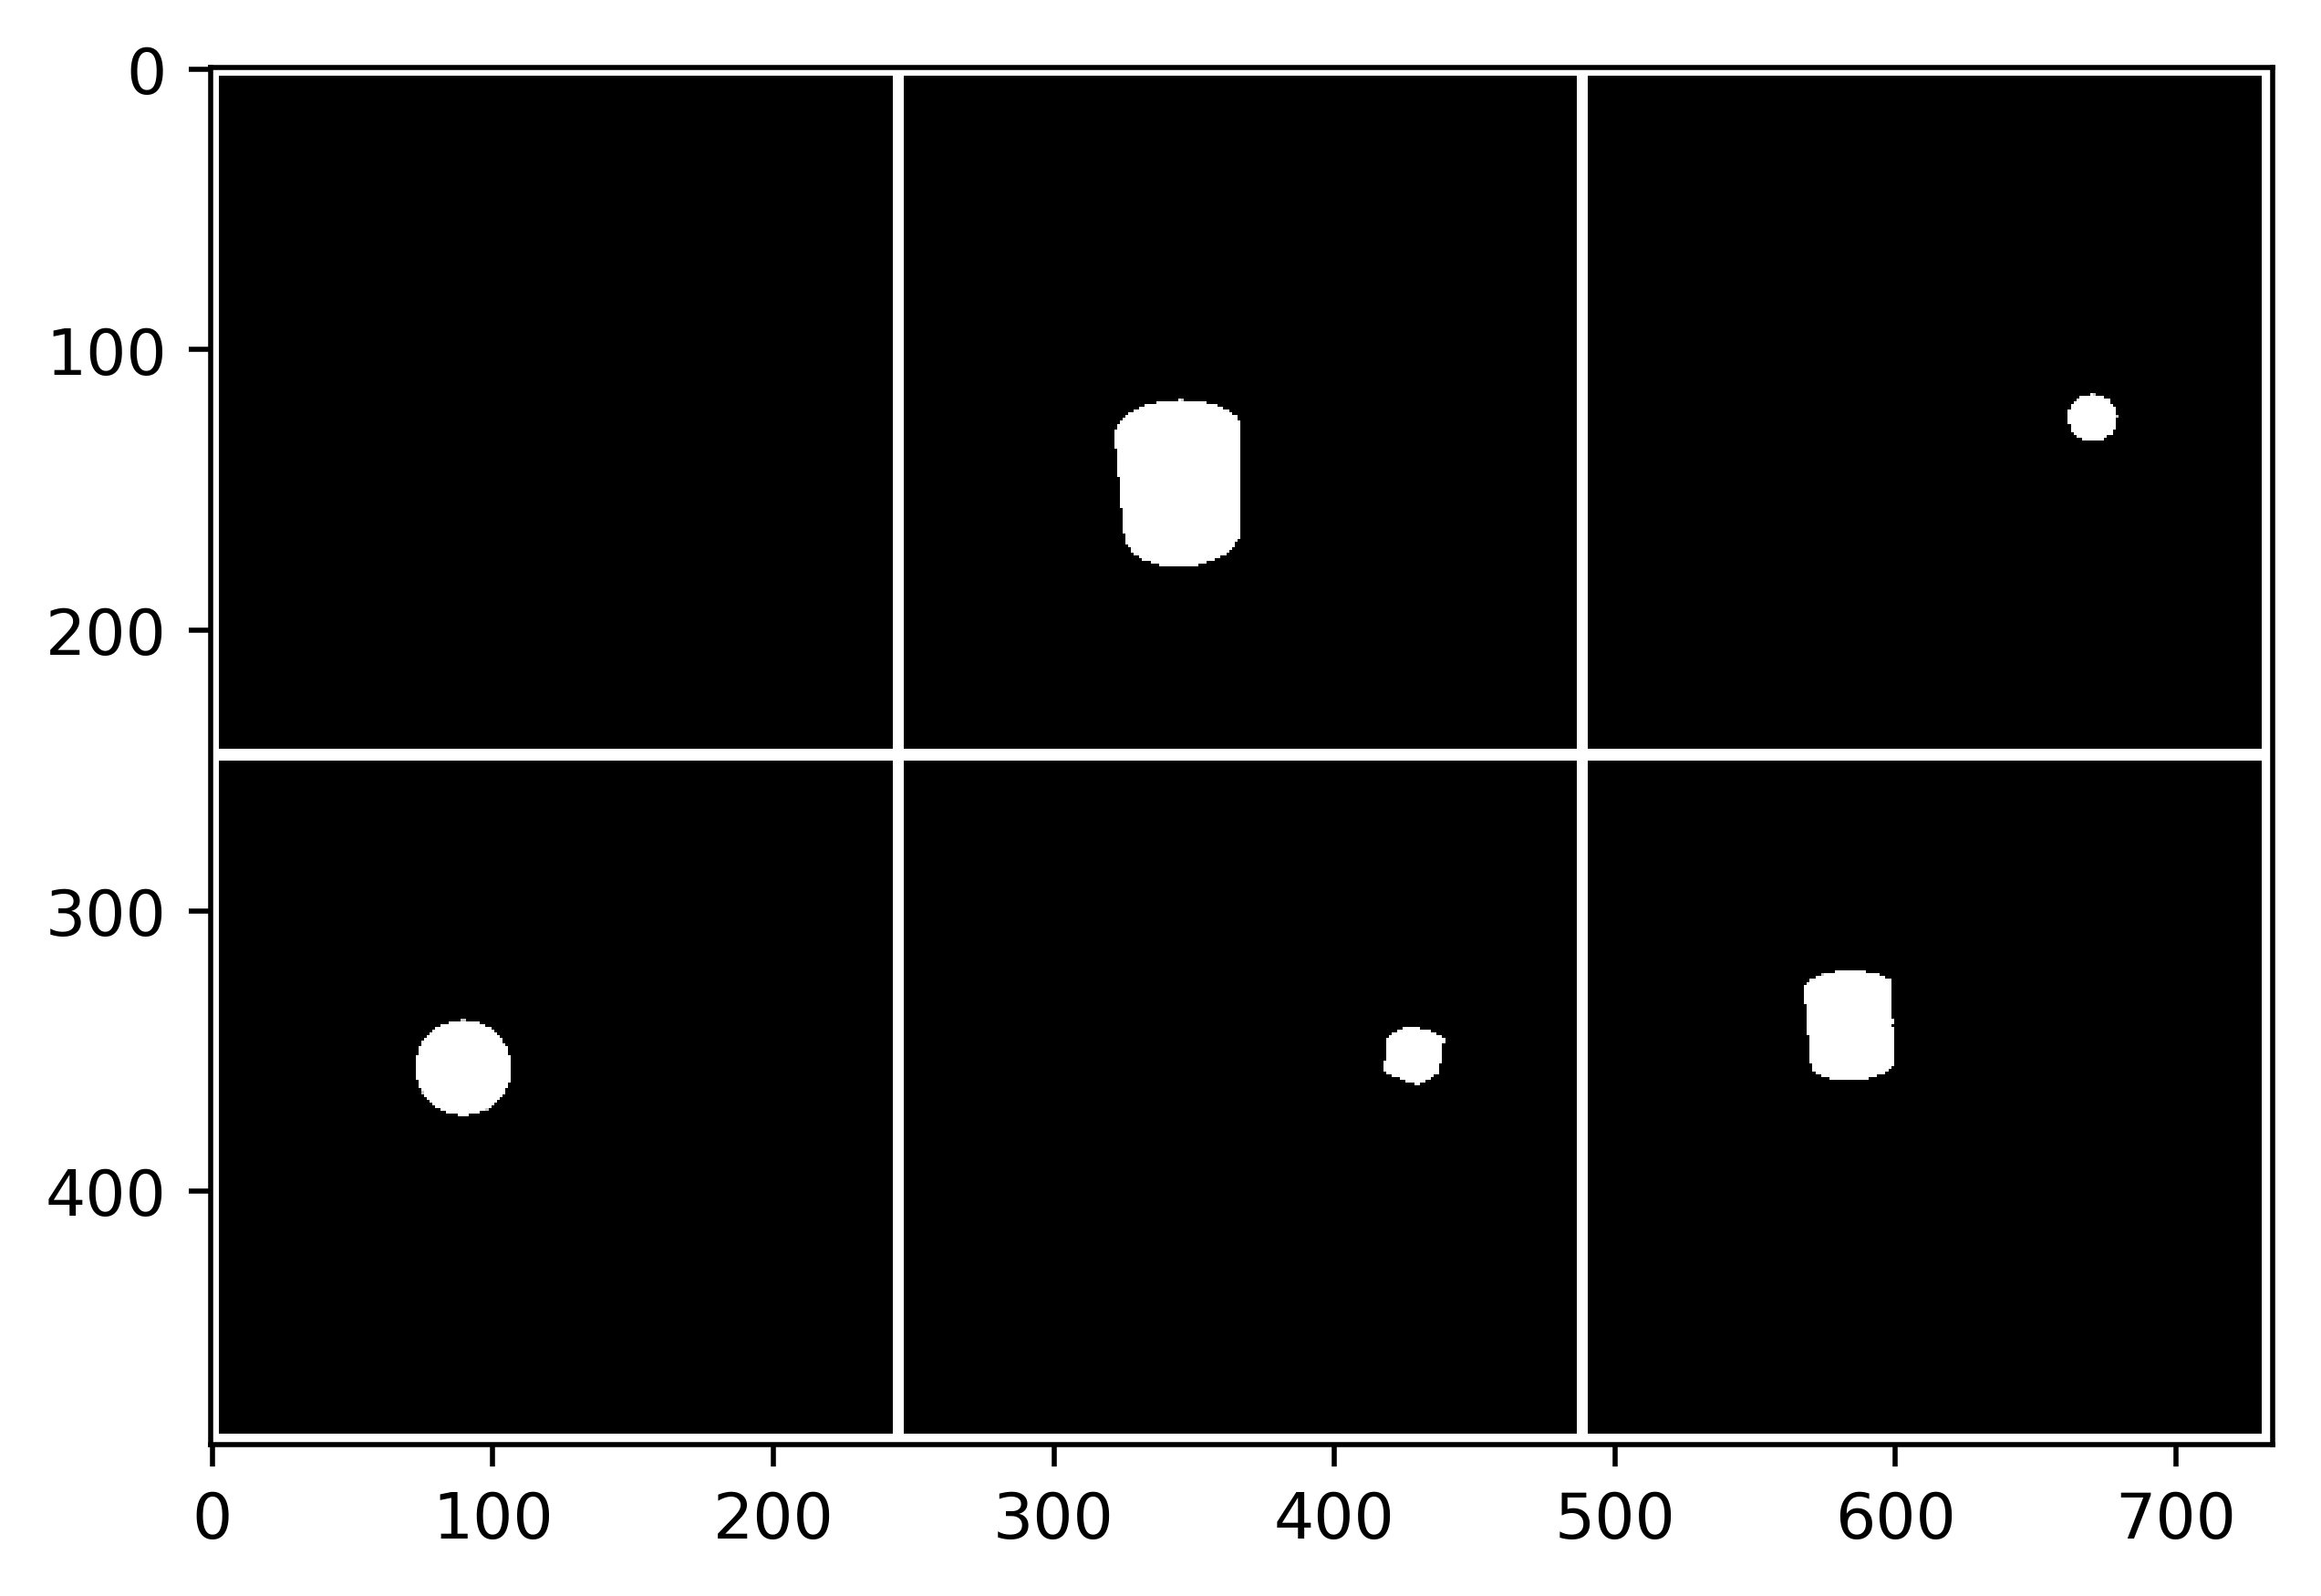

In [267]:
subs = imgs.copy()[1:]
n = subs.shape[0]
print(n)
subs = np.vstack(subs)
subs = cv2.cvtColor(subs, cv2.COLOR_BGR2GRAY)
subs = subs.reshape(n, 240, 240)
subs = subs - np.stack([subs[0]] * n)
mask = subs > 200
subs[mask] = 0
idx = np.where(np.logical_and(subs > 100, subs< 200))
subs[idx] = 255
view_gray(subs,500)
print(subs.shape)

(6, 240, 240)
torch.Size([3, 491, 735])


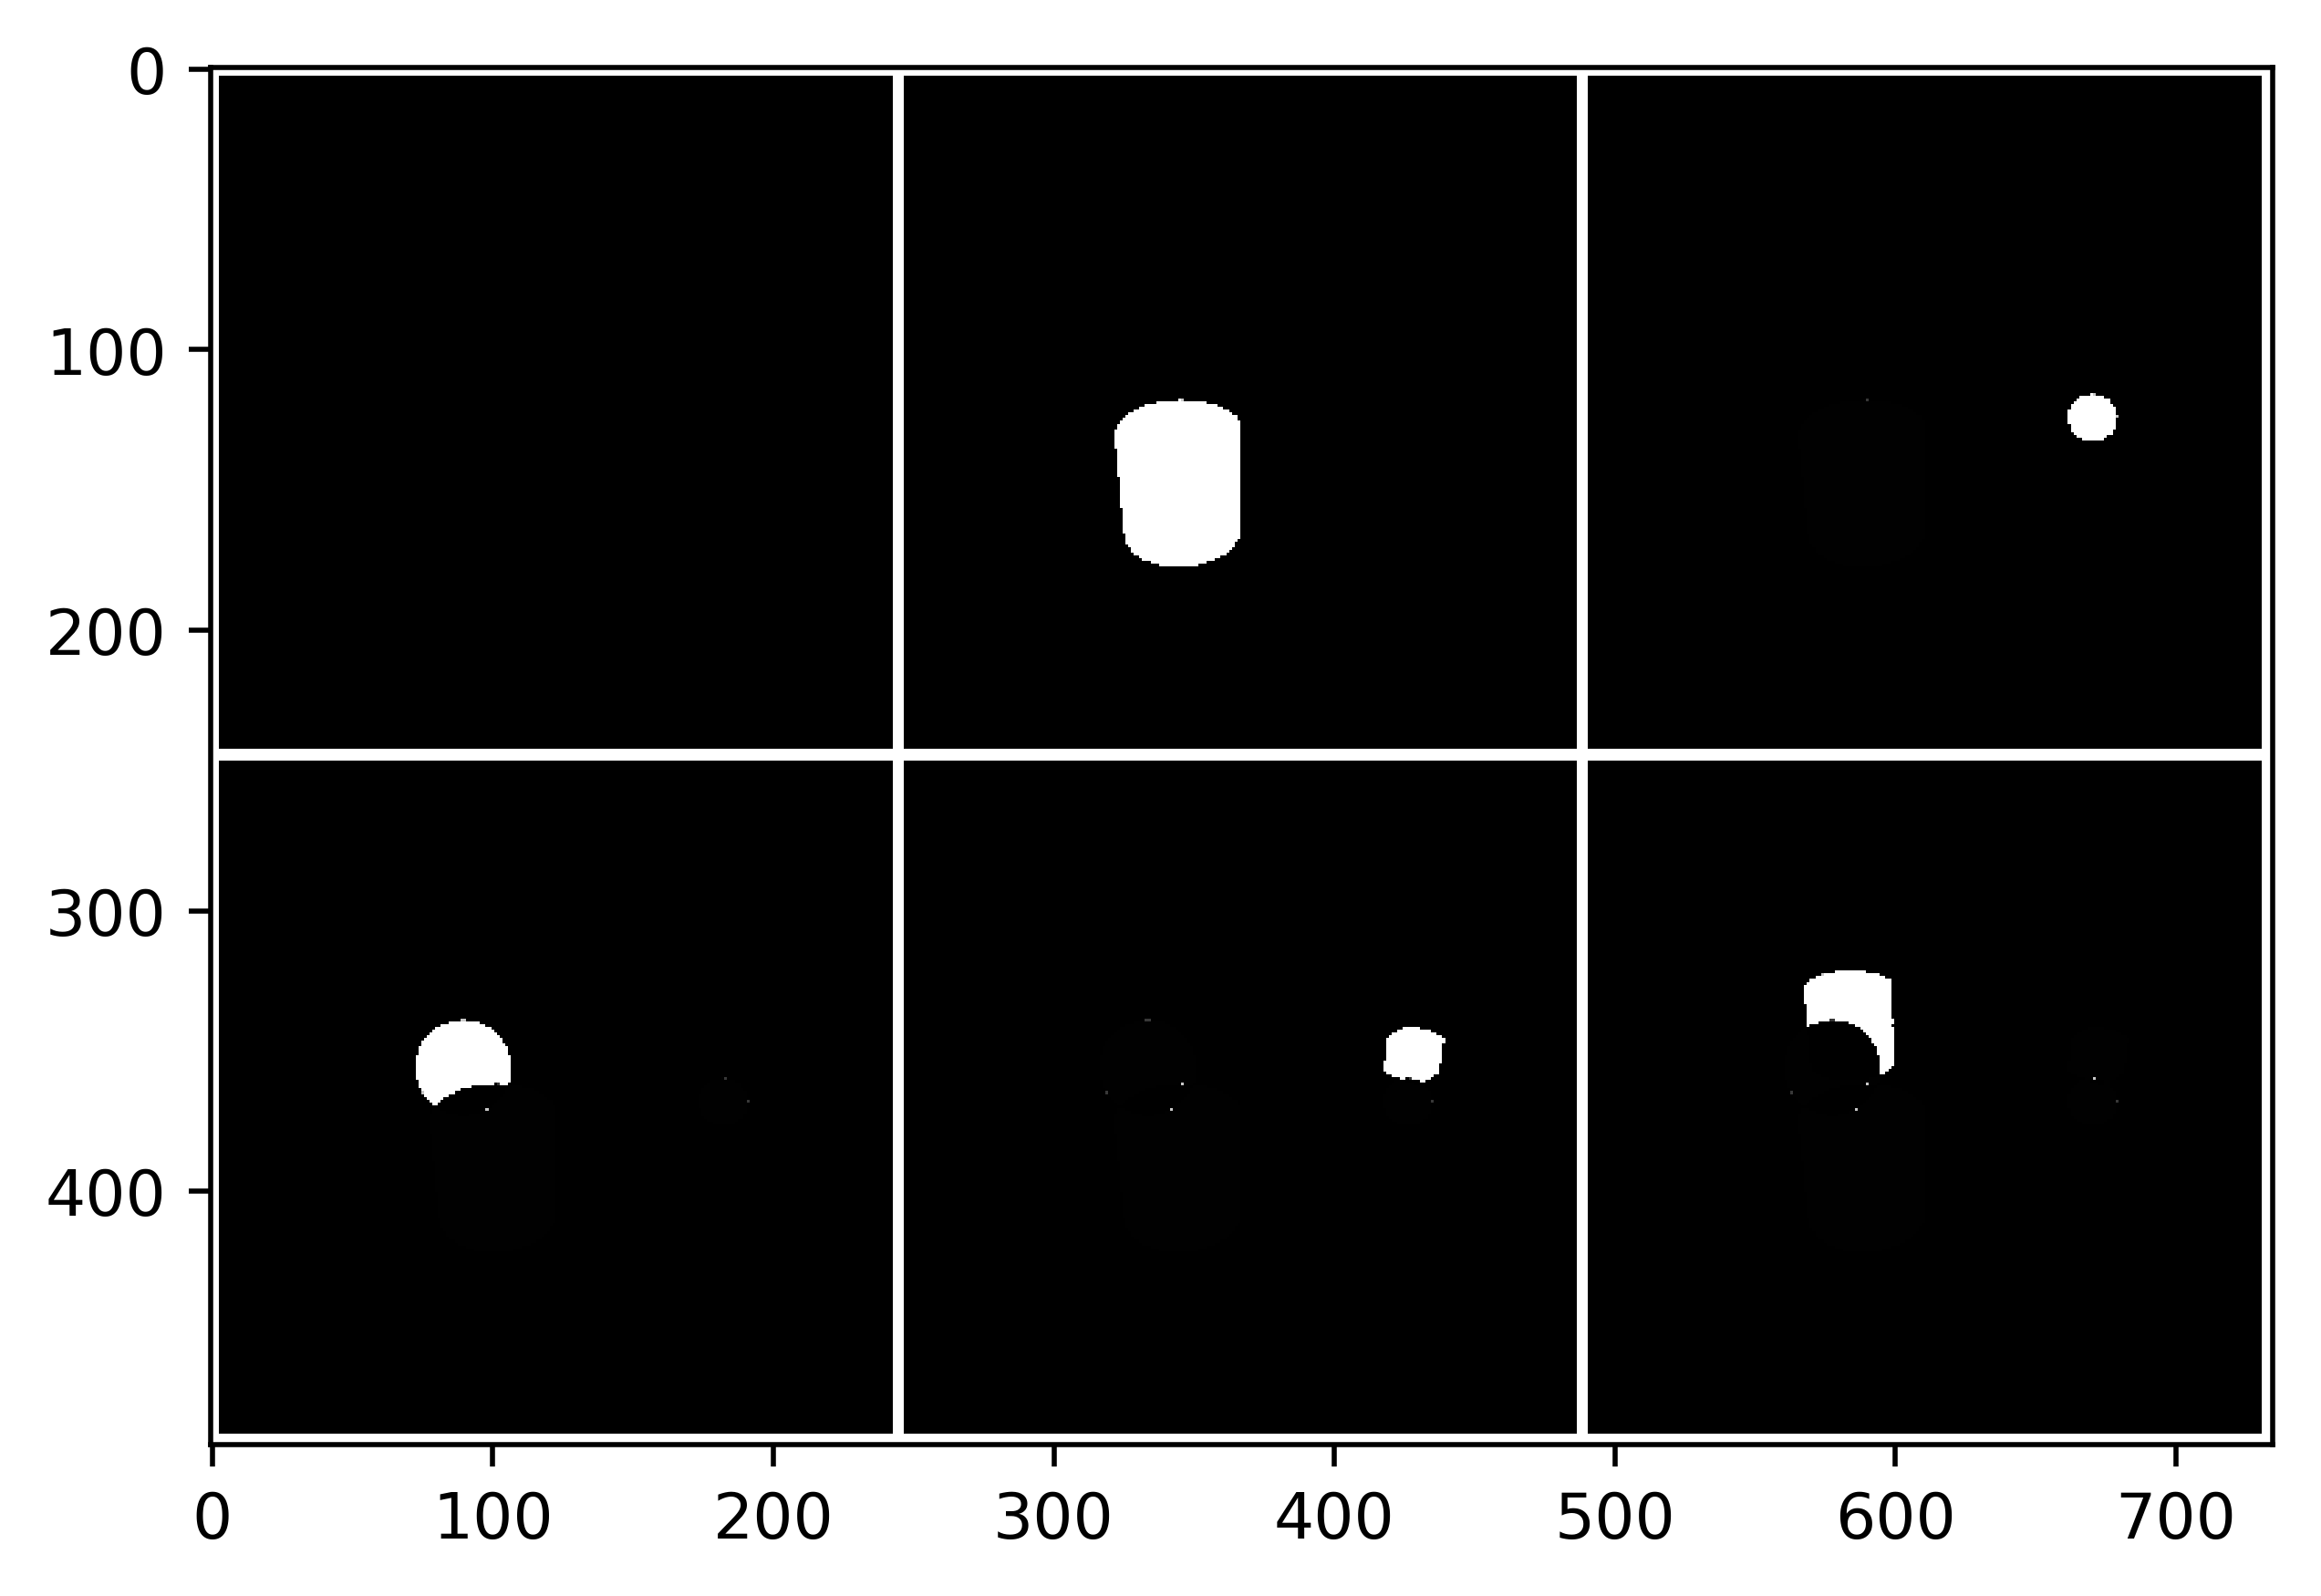

In [268]:
masks = subs.copy().astype(np.int16)
masks[1] = masks[1] - masks[0]
masks[2] = masks[2] - masks[1]
masks[3] = masks[3] - np.abs(masks[2])
masks[4] = masks[4] - np.abs(masks[3])
masks[5] = masks[5] - np.abs(masks[4])
view_gray(masks.astype(np.uint8), 500)

In [265]:
ii = img.copy()
for a in ann:
    x = a['pixel_coords'][0]
    y = a['pixel_coords'][1]
    ii = cv2.circle(ii, (x, y), 2, (0,255,255), -1)
    pts = np.array(a['pixel_bbox'])[:,:2].astype(int)
    ii = cv2.polylines(ii, [pts[:4]], 1, (0,255,0))
    ii = cv2.polylines(ii, [pts[4:]], 1, (0,255,0))
    tl = (np.min(pts[:,0]), np.min(pts[:,1]))
    br = (np.max(pts[:,0]), np.max(pts[:,1]))
    ii = cv2.rectangle(ii, tl, br, (255,0,0), 1)

view_image(ii)

TypeError: Expected cv::UMat for argument 'img'

In [12]:
for a in ann:
    print(a['shape'], a['pixel_coords'])

cylinder [170, 142, 9.131300926208496]
sphere [100, 122, 10.406447410583496]
cube [114, 108, 11.484865188598633]
cube [55, 113, 11.079505920410156]
sphere [75, 102, 12.036158561706543]
